In [15]:
# Question 1: Cloud Computing for Deep Learning

# (a) Elasticity and Scalability in Cloud Computing for Deep Learning

# Elasticity refers to the ability of a cloud computing system to automatically adjust resources in real-time based on demand. For deep learning, this means allocating more GPU instances during training and scaling down when they are no longer needed.

# Scalability is the capability of a system to handle increasing workloads by adding more resources (vertical scaling) or distributing the load across multiple instances (horizontal scaling). In deep learning, scalability allows training on large datasets across multiple GPUs or TPUs.

# (b) Comparison of AWS SageMaker, Google Vertex AI, and Microsoft Azure ML Studio

# AWS SageMaker: Provides fully managed infrastructure for model training, automatic hyperparameter tuning, and deployment. Supports popular deep learning frameworks like TensorFlow and PyTorch.

# Google Vertex AI: Offers pre-built models, AutoML, and integration with Google Cloud TPUs for high-performance deep learning training.

# Azure ML Studio: Focuses on MLOps with strong integration into Microsoft’s ecosystem, supports automated ML and drag-and-drop model building.


In [13]:
#Question 2: Convolution Operations with Different Parameters
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

# Define 5x5 input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]], dtype=np.float32)

# Reshape to fit Conv2D input shape
input_matrix = input_matrix.reshape(1, 5, 5, 1)

# Define 3x3 kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32).reshape(3, 3, 1, 1)

# Function to perform convolution with different parameters
def apply_convolution(input_matrix, kernel, stride, padding):
    input_tensor = tf.constant(input_matrix, dtype=tf.float32)
    kernel_tensor = tf.constant(kernel, dtype=tf.float32)
    conv_layer = Conv2D(filters=1, kernel_size=(3, 3), strides=stride, padding=padding, use_bias=False)
    conv_layer.build(input_tensor.shape)
    conv_layer.set_weights([kernel_tensor])
    output = conv_layer(input_tensor)
    return output.numpy().squeeze()

# Perform convolutions
print("Stride = 1, Padding = 'VALID'\n", apply_convolution(input_matrix, kernel, 1, 'valid'))
print("Stride = 1, Padding = 'SAME'\n", apply_convolution(input_matrix, kernel, 1, 'same'))
print("Stride = 2, Padding = 'VALID'\n", apply_convolution(input_matrix, kernel, 2, 'valid'))
print("Stride = 2, Padding = 'SAME'\n", apply_convolution(input_matrix, kernel, 2, 'same'))

Stride = 1, Padding = 'VALID'
 [[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]
Stride = 1, Padding = 'SAME'
 [[ -9.  -4.  -4.  -4.  13.]
 [-21.  -6.  -6.  -6.  27.]
 [-36.  -6.  -6.  -6.  42.]
 [-51.  -6.  -6.  -6.  57.]
 [-39.  -4.  -4.  -4.  43.]]
Stride = 2, Padding = 'VALID'
 [[-6. -6.]
 [-6. -6.]]
Stride = 2, Padding = 'SAME'
 [[ -9.  -4.  13.]
 [-36.  -6.  42.]
 [-39.  -4.  43.]]


Error: Image not found. Using a random grayscale image instead.


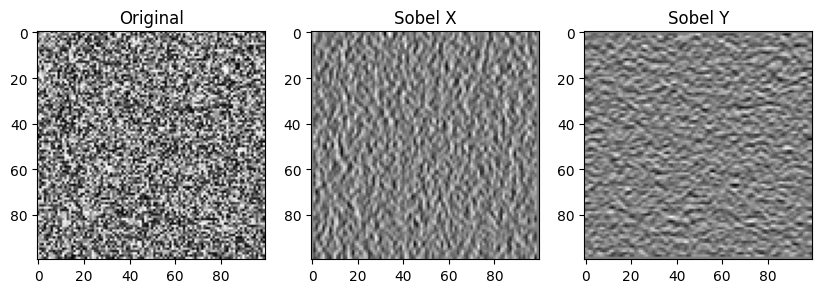

In [11]:
#Question 3: CNN Feature Extraction with Filters and Pooling
#(a) Edge Detection Using Sobel Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use one of the three methods to define your image path correctly
image_path = r"C:\Users\ashri\OneDrive\Desktop\NEURAL NETWORKS\FvYYq.jpg"  # Raw string

# Load a grayscale image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found. Using a random grayscale image instead.")
    image = np.random.randint(0, 255, (100, 100), dtype=np.uint8)  # Generate a dummy grayscale image

# Apply Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Display images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.show()


In [14]:
#(b) Max Pooling and Average Pooling
import tensorflow as tf

# Define a 4x4 input matrix
input_matrix = np.random.randint(0, 10, (1, 4, 4, 1)).astype(np.float32)

# Apply Max Pooling and Average Pooling
max_pool = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')
avg_pool = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')

print("Original Matrix:\n", input_matrix.squeeze())
print("Max Pooled Matrix:\n", max_pool.numpy().squeeze())
print("Average Pooled Matrix:\n", avg_pool.numpy().squeeze())

Original Matrix:
 [[5. 7. 7. 0.]
 [5. 5. 1. 3.]
 [4. 6. 8. 1.]
 [1. 1. 7. 7.]]
Max Pooled Matrix:
 [[7. 7.]
 [6. 8.]]
Average Pooled Matrix:
 [[5.5  2.75]
 [3.   5.75]]


In [5]:
#Question 4: Implementing and Comparing CNN Architectures
#(a) Implementing AlexNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,622,154 (82.48 MB)

 Trainable params: 21,622,154 (82.48 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#(b) Implementing a Residual Block and ResNet-like Model
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model

def residual_block(input_tensor, filters):
    x = Conv2D(filters, (3,3), activation='relu', padding='same')(input_tensor)
    x = Conv2D(filters, (3,3), activation='relu', padding='same')(x)
    x = Add()([x, input_tensor])
    return x

input_layer = Input(shape=(32, 32, 3))
x = Conv2D(64, (7,7), strides=2, activation='relu', padding='same')(input_layer)
x = residual_block(x, 64)
x = residual_block(x, 64)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

resnet_model = Model(inputs=input_layer, outputs=output_layer)
resnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 64)     │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 16, 16, 64)     │              0 │ conv2d_11[0][0],       │
│                           │                        │                │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 16, 16, 64)     │         36,928 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 16, 16, 64)     │              0 │ conv2d_13[0][0],       │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 16384)          │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │      2,097,280 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,255,754 (8.61 MB)

 Trainable params: 2,255,754 (8.61 MB)

 Non-trainable params: 0 (0.00 B)